#### Aula 10: Exercícios

#### a) Utilizando o GIMP, aplique as operações morfológicas básicas em uma imagem em escala de cinza para verificar o comportamento da dilatação e da erosão (menu Filtros → Genéricos). Tente fazer um gradiente morfológico aplicando a dilatação, a erosão e a subtração (faça subtração de camadas). 

#### b) Utilizando a imagem disponibilizada no SIGAA, faça o processo chamado de “segmentação de textura”. A imagem traz um conjunto de círculos de dois tamanhos diferentes claramente divididos em duas regiões. Utilize a operação de fechamento até remover os círculos menores. Depois, utilize a função de abertura até remover os círculos maiores. Você terá uma imagem com duas regiões bem delimitadas, a região onde estavam os círculos pequenos e a região onde estavam os círculos grandes. Utilize essa imagem para traçar a divisão na imagem original (utilize gradiente morfológico na imagem das regiões para gerar a linha de divisão).

In [55]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

##### item a)

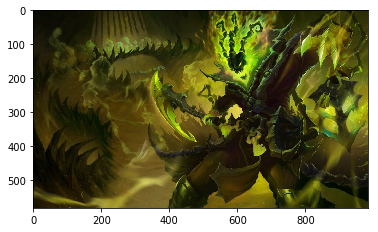

In [2]:
img = cv2.imread('thresh.jpg')
plt.imshow(img)

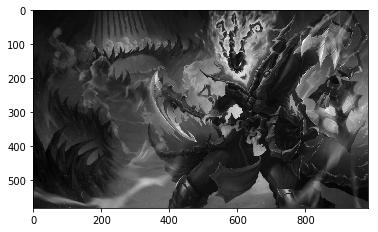

In [3]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap = 'gray')

In [7]:
#cv2.imwrite('gray.jpg',gray)

True

Text(0.5, 1.0, 'gradiente')

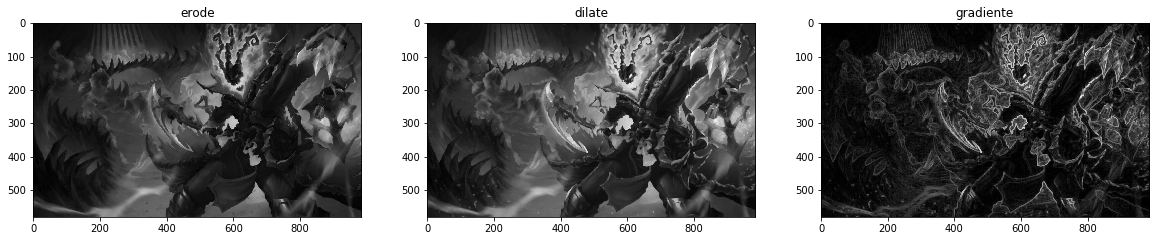

In [7]:
# item a)

erode = cv2.imread('erode.jpg')
dilate = cv2.imread('dilate.jpg')
grad = cv2.imread('grad.jpg')

plt.figure(figsize = (20,20))
plt.subplot(1,3,1)
plt.imshow(erode)
plt.title('erode')

plt.subplot(1,3,2)
plt.imshow(dilate)
plt.title('dilate')

plt.subplot(1,3,3)
plt.imshow(grad)
plt.title('gradiente')

##### item b)

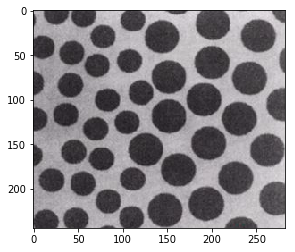

In [103]:
img = cv2.imread('textura.png')
#img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img,cmap = 'gray')

In [104]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

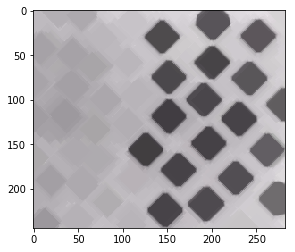

In [110]:
close = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel,iterations = 16)

plt.imshow(close)

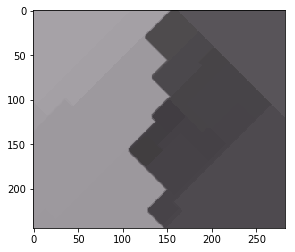

In [121]:
open = cv2.morphologyEx(close,cv2.MORPH_OPEN,kernel,iterations = 100)

plt.imshow(open)

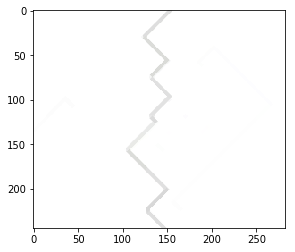

In [163]:
dilate = cv2.morphologyEx(open,cv2.MORPH_DILATE,kernel,iterations = 2)
erode = cv2.morphologyEx(open,cv2.MORPH_ERODE,kernel,iterations = 2)

result = dilate - erode
result = np.bitwise_not(result)
result = cv2.morphologyEx(result,cv2.MORPH_CLOSE,kernel,iterations = 2)
plt.imshow(result)

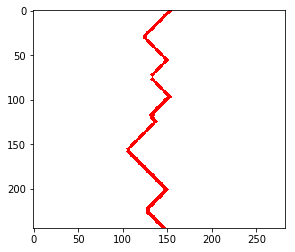

In [182]:
line = cv2.cvtColor(result,cv2.COLOR_RGB2GRAY)
_,line = cv2.threshold(line,235,255,cv2.THRESH_BINARY)
color = 255*np.ones_like(line)
img_lb = cv2.merge([color,line,line])
plt.imshow(img_lb,cmap = 'gray')

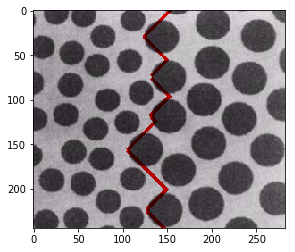

In [183]:
final = np.bitwise_and(img,img_lb)

plt.imshow(final)